In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart-1.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


[]

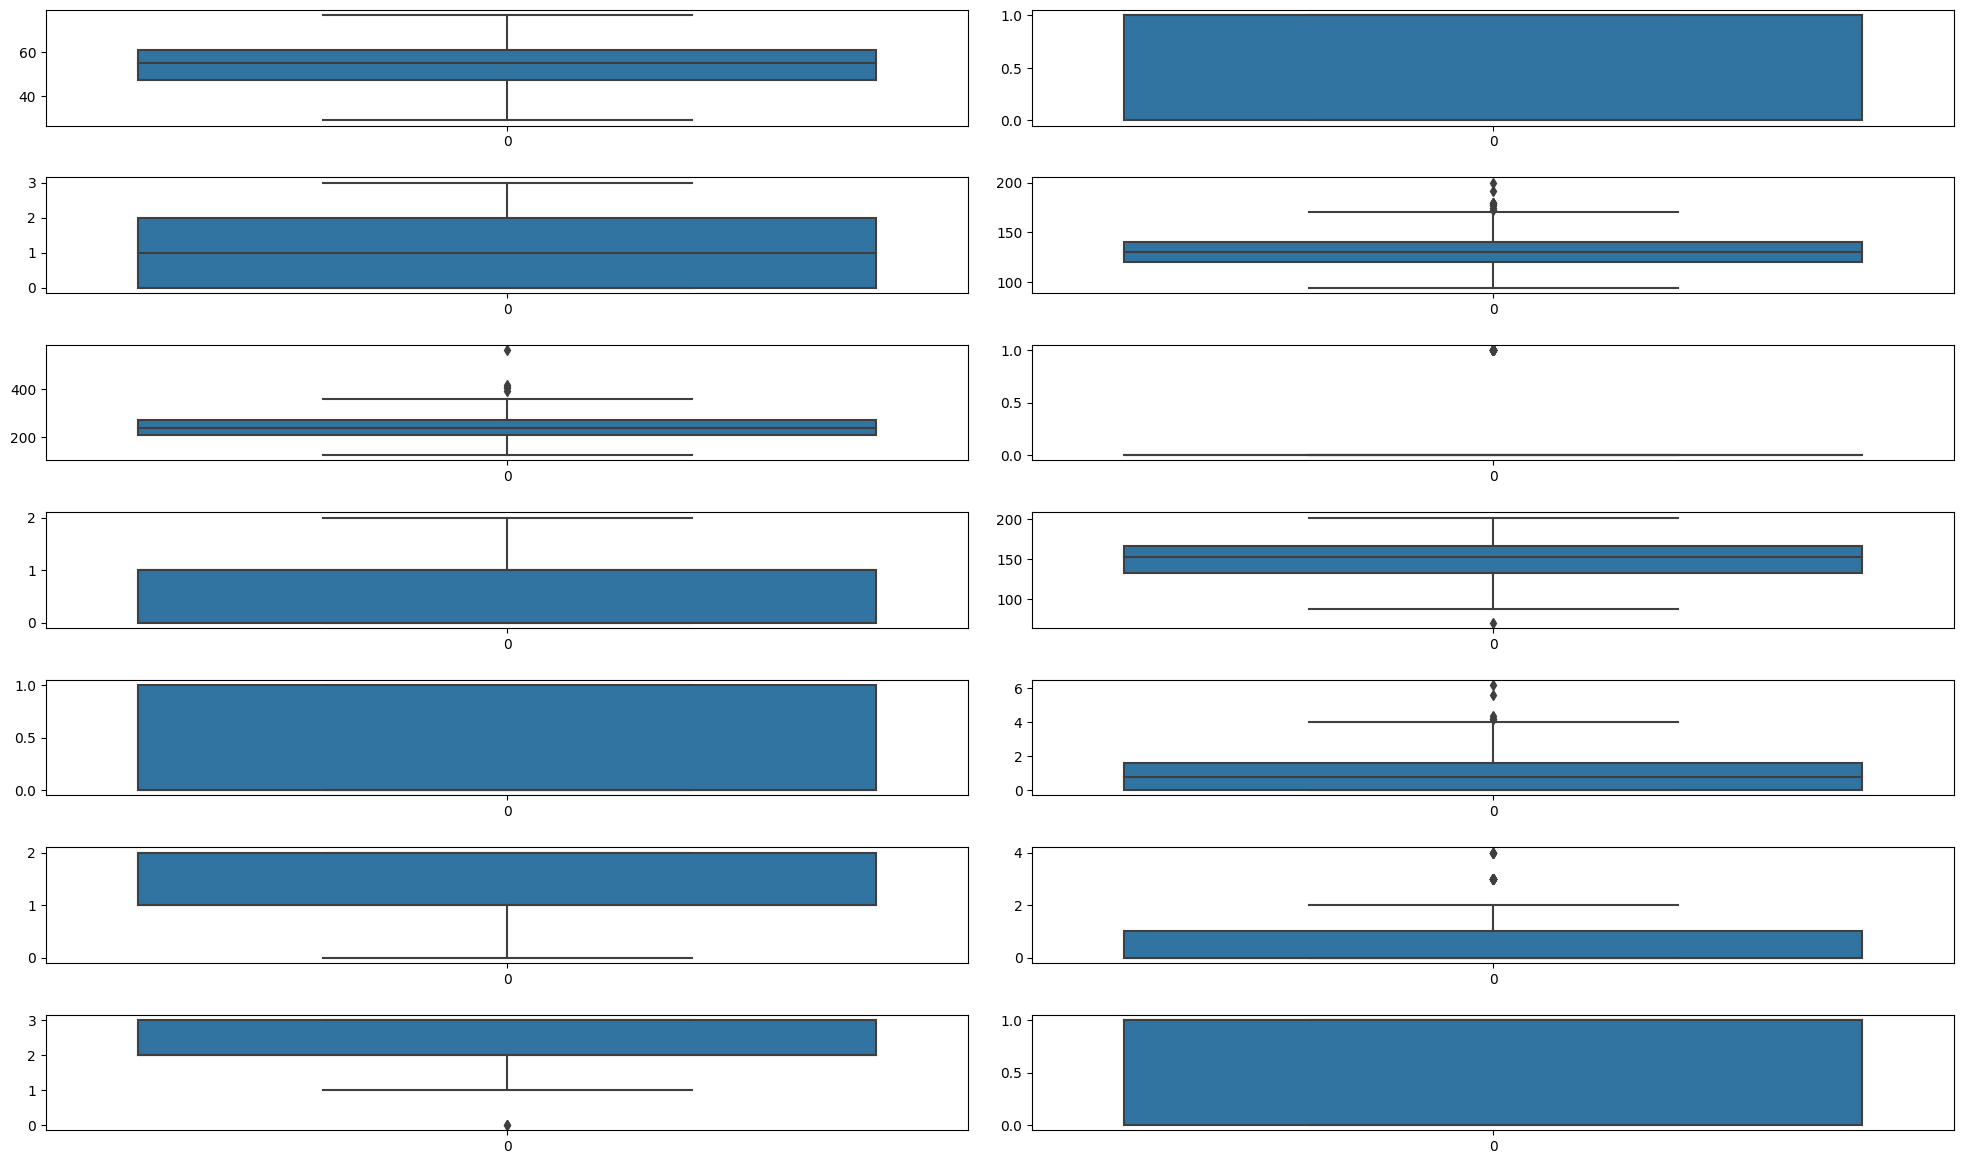

In [7]:
#checking outliers

fig,ax=plt.subplots(nrows=7, ncols=2, figsize=(20,12))
for variable, subplot in zip (df.columns, ax.flatten()):
    sns.boxplot(df[variable],ax=subplot)
    plt.tight_layout(pad=2,h_pad=2)
plt.plot()

In [8]:
import plotly.graph_objects as go

fig = go.Figure()

for i,variable in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[variable],name=variable,boxpoints = 'all',jitter = 0.5,whiskerwidth = 0.2,marker=dict(size =2),line=dict(width=1)))

fig.update_layout(
    title = 'Boxplot for each variable',
    xaxis = dict(title = 'Variables'),
    yaxis = dict(title = 'Value'),
    height = 900,
    width = 900,
    showlegend=False
)

fig.show()

In [9]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
df['sex']= df.sex.map({0:'female' , 1:'male'})

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,0


<Figure size 3000x2000 with 0 Axes>

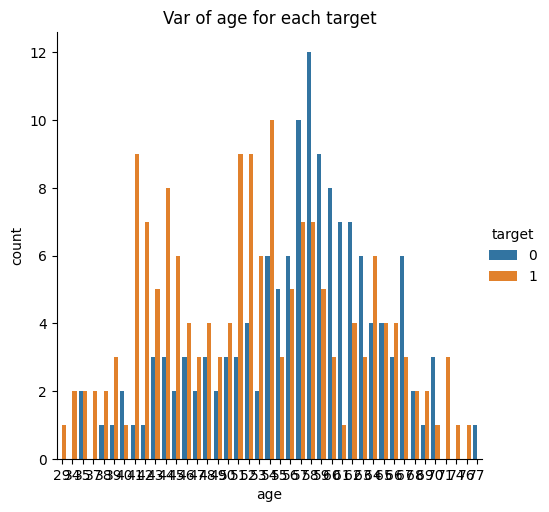

In [13]:
plt.figure(figsize= (30,20))
sns.catplot(kind = 'count', data = df, x ='age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Var of age for each target')
plt.show()

In [15]:
import plotly.express as px
fig = px.histogram(df, x='age', color = 'target',barmode = 'group', title = 'Var of age for each target class')
fig.update_layout(xaxis_title = 'age', yaxis_title='count', legend_title='Target', showlegend = True)
fig.show()


In [16]:
df['sex']= df.sex.map({'female':0 , 'male':1})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
df_feature = df.drop(['target'],axis=1)
df_feature.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
#Model Building

In [18]:
from sklearn.model_selection import train_test_split


In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(df_feature,df['target'],test_size=0.20, random_state=42)

In [22]:
xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [23]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [24]:
ytrain

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [25]:
ytest

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

Standardisation of Data(for rescaling of data)- So that larger value data are not given more importance.

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
ss = StandardScaler()

In [28]:
X_train = ss.fit_transform(xtrain)
X_test = ss.transform(xtest)

In [29]:
X_train

array([[-1.35679832,  0.72250438,  0.00809909, ...,  0.95390513,
        -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912, ..., -0.69498803,
        -0.68970073, -0.50904773],
       ...,
       [ 1.58263146,  0.72250438,  1.96807914, ..., -0.69498803,
         0.32186034, -0.50904773],
       [-0.92132724,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [ 0.92942484, -1.38407465,  0.00809909, ...,  0.95390513,
         1.33342142, -0.50904773]])

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf= DecisionTreeClassifier(random_state=10)
clf.fit(X_train,ytrain)
y_train_pred =  clf.predict(X_train)
y_test_pred  =  clf.predict(X_test)

In [32]:
from sklearn import tree

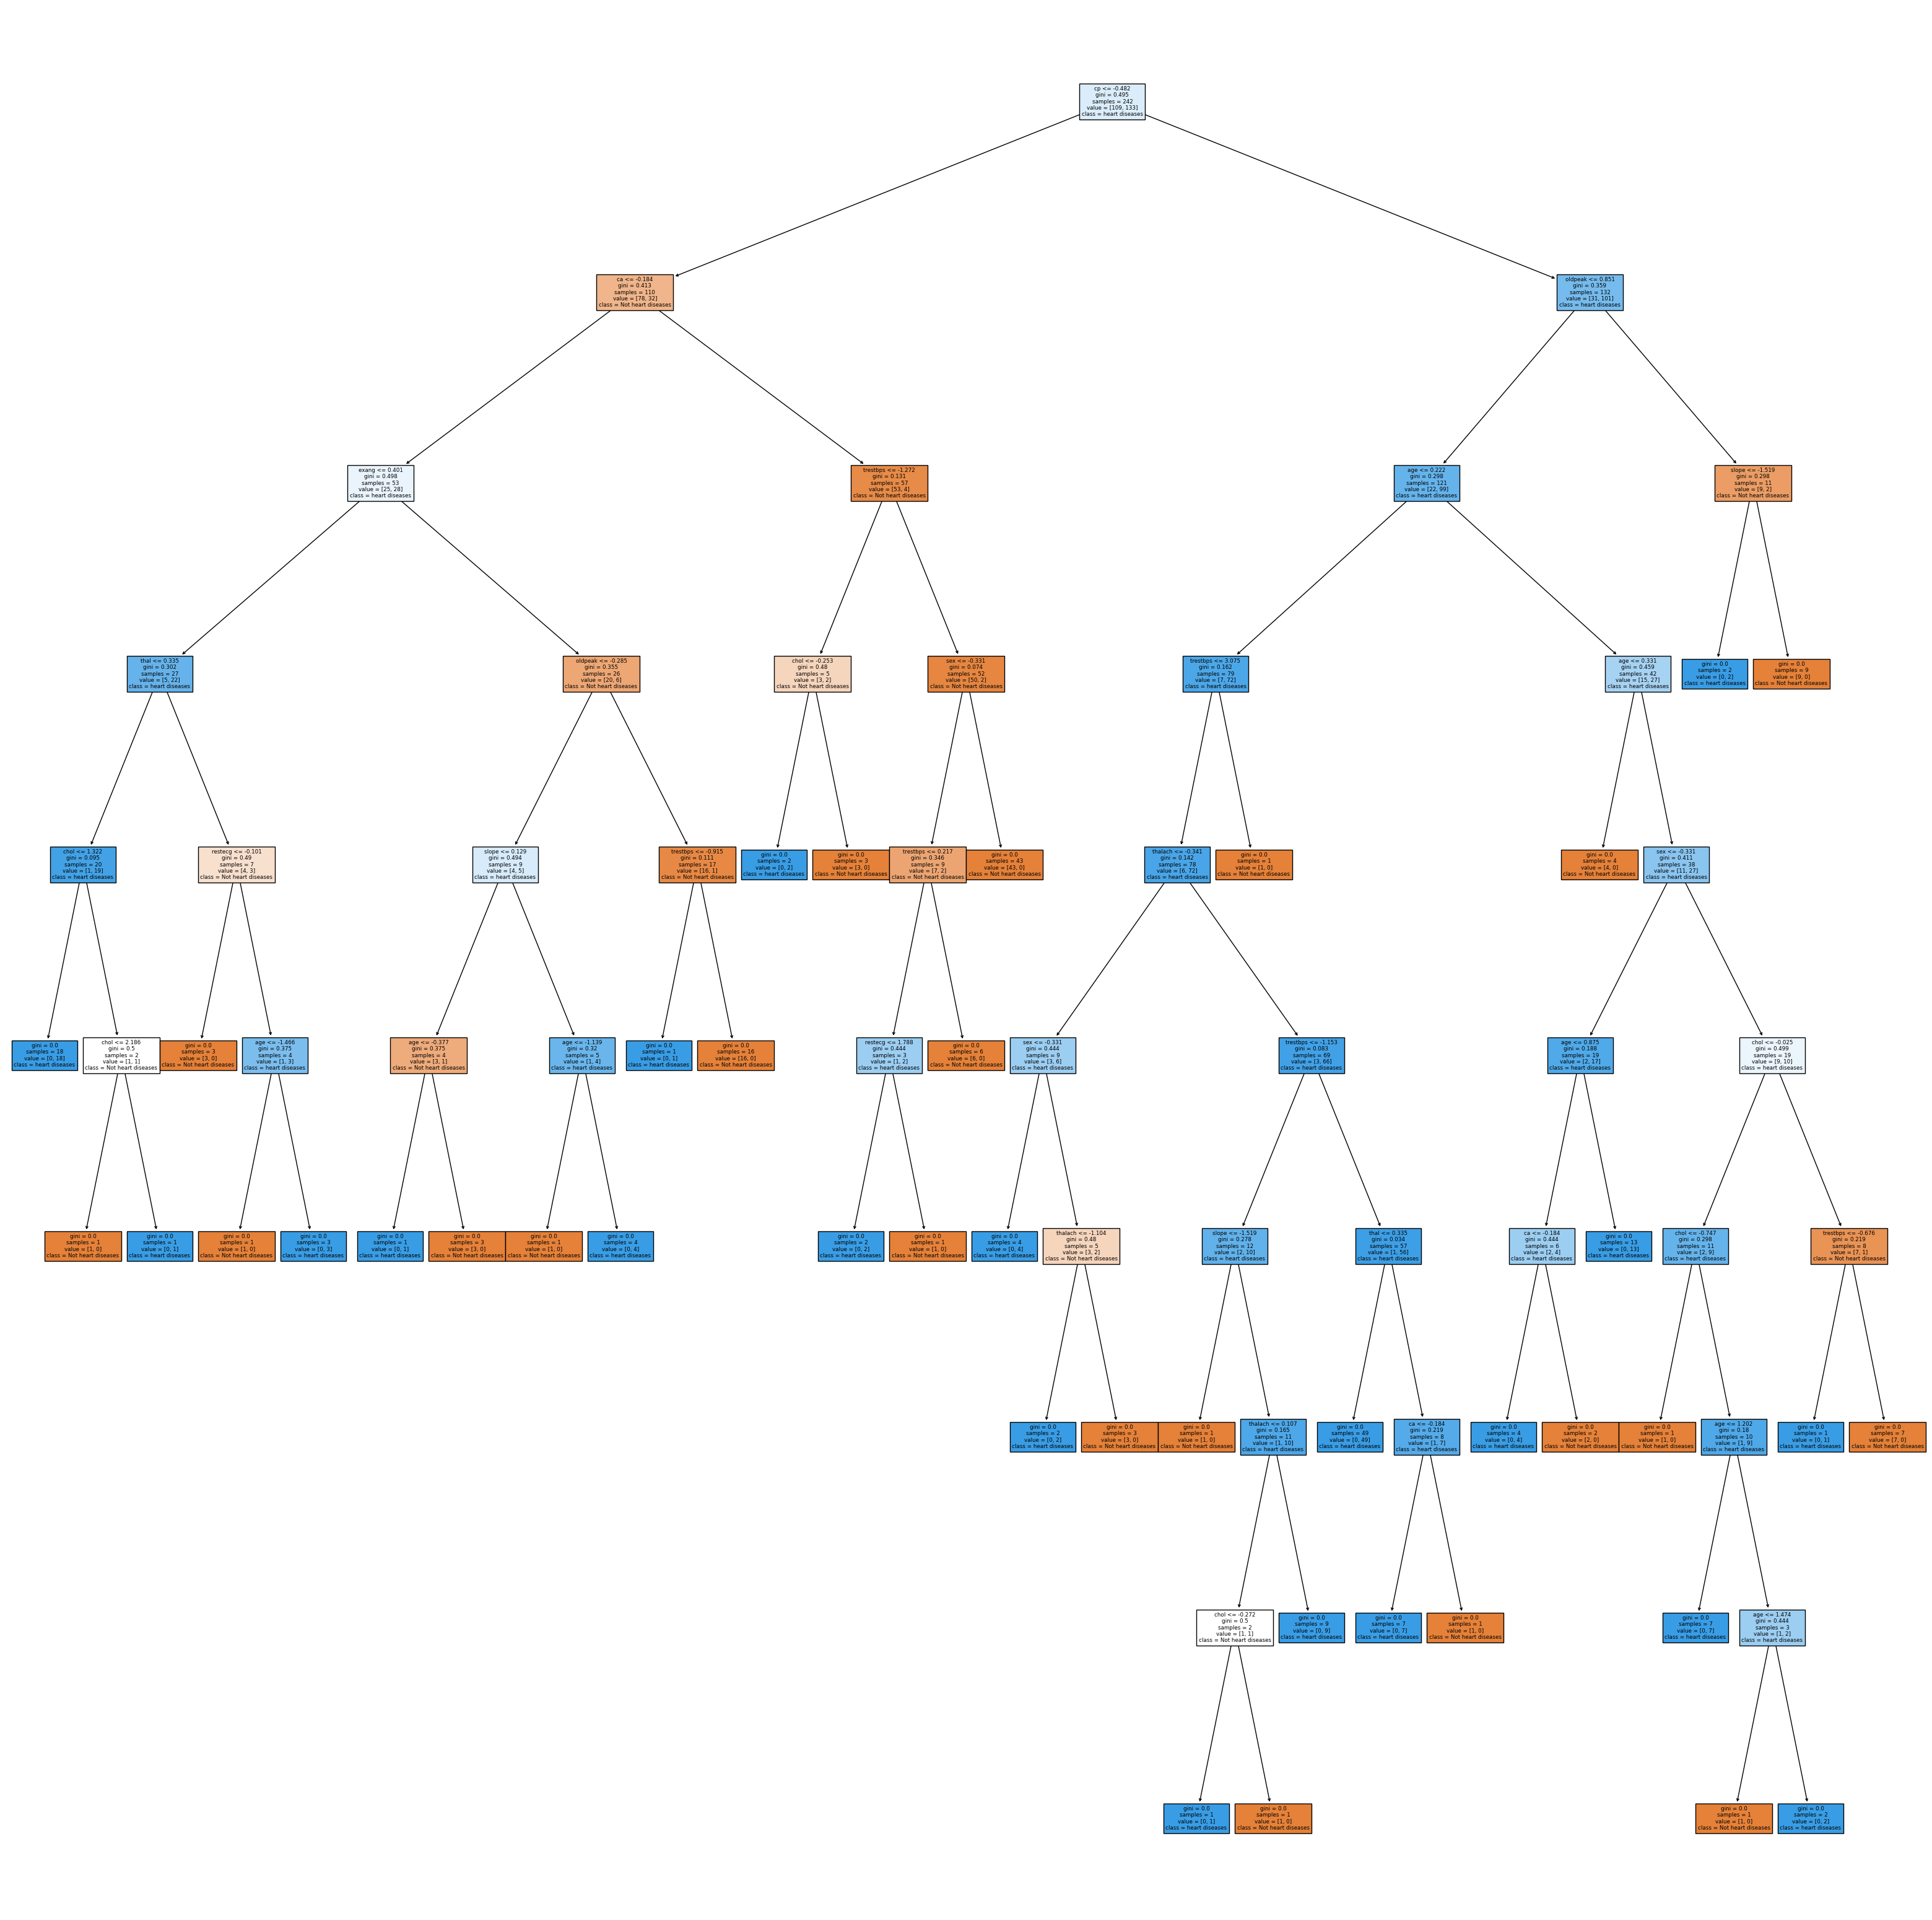

In [35]:
plt.figure(figsize=(40,40))
features = df.columns
classes =['Not heart diseases', 'heart diseases']
tree.plot_tree(clf, feature_names = features, class_names = classes, filled = True)
plt.show()

In [37]:
from sklearn.metrics import *

In [38]:
accuracy_score(y_train_pred, ytrain)

1.0

In [39]:
accuracy_score(y_test_pred, ytest)

0.8360655737704918

In [44]:
#The model is overfitting. Therefore it need to be fitted properly.
#Hyperparameter tuning
params = {
    'max_depth':[2,4,6,8,10,12],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf': [1,2]
}

In [41]:
from sklearn.model_selection import GridSearchCV

In [45]:
clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,ytrain)
gcv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=4)

In [49]:
model_gcv = gcv.best_estimator_
model_gcv.fit(X_train,ytrain)
y_train_pred = model_gcv.predict(X_train)
y_test_prd = model_gcv.predict(X_test)

In [50]:
accuracy_score(y_train_pred, ytrain)

0.8842975206611571

In [51]:
accuracy_score(y_test_pred, ytest)

0.8360655737704918

In [52]:
'''
1. Load the Dataset
2. EDA(null values, outliers)
3. Feature Engineering(Encoding, Rescaling)
4. Feature Selection(PCA,LDA,IV,VIF,CHI-square)
5. Model building
6. Validation
7. Hyperparameters, if required
8. Deployment
'''

'\n1. Load the Dataset\n2. EDA(null values, outliers)\n3. Feature Engineering(Encoding, Rescaling)\n4. Feature Selection(PCA,LDA,IV,VIF,CHI-square)\n5. Model building\n6. Validation\n7. Hyperparameters, if required\n8. Deployment\n'